# Filters
Filters are functions that use more than one pixel from the source image to compute the value of a pixel. Filters are implemented as convolution operation in which a kernel function H is applied onto the pixels of an image.

$$I'(u, v) = \sum_{i=-\infty}^{\infty} \sum_{j=-\infty}^{\infty}I(u - i, v - j)H(i, j)$$

We'll see som example of linear kernels and some of nonlinear ones.

In [1]:
import numpy as np
import skimage
from skimage import io
from skimage import util
from skimage import filters
import matplotlib as mpl
import matplotlib.pyplot as plt
from platform import python_version
print("python version: %s"%python_version())
print("numpy version: %s"%np.__version__)
#print("pandas version: %s"%pd.__version__)
print("skimage version: %s"%skimage.__version__)
print("matplotlib version: %s"%mpl.__version__)

python version: 3.8.2
numpy version: 1.18.1
skimage version: 0.17.2
matplotlib version: 3.3.1


## Local 3x3 mean filter
The mean filter that can be used to denoise an image, i.e. to smooth extremes pixel values.

In [2]:
def dip_localMeanFilter(image):
    # Creates a smoothed image from the input one by computing the
    # average value of each pixel from its neighbors' values
    rows = image.shape[0]
    cols = image.shape[1]
    smooth_img = np.zeros((rows, cols), dtype=int)
    
    for col in range(0, cols - 1):
        for row in range(0, rows - 1):
            sum = 0
            for i in range(-1, 2):
                for j in range(-1, 2):
                    v = image[row + i, col + j]
                    sum = sum + v
            smooth_img[row, col] = int(round( sum / 9.0 ))
    
    return smooth_img

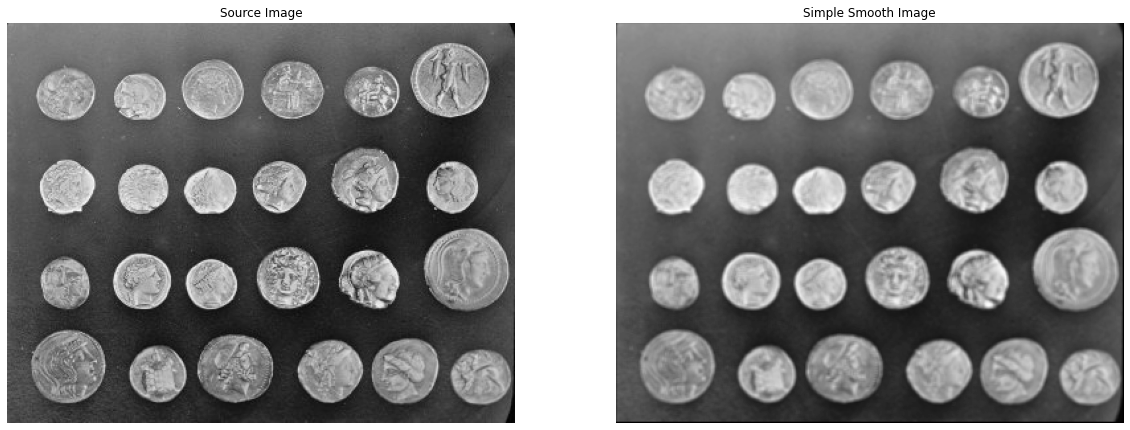

In [3]:
source_img = skimage.data.coins()
smooth_img = dip_localMeanFilter(source_img)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].set_axis_off()
axes[0].set_title('Source Image')
axes[0].imshow(source_img, cmap='gray')
axes[1].set_axis_off()
axes[1].set_title('Simple Smooth Image')
axes[1].imshow(smooth_img, cmap='gray')

## Local 3x3 Gaussian filter 

In [4]:
def dip_localGaussianFilter(image):
    # Creates a smoothed image from the input one by computing the
    # average value of each pixel from its neighbors' values
    H = np.array(((0.075, 0.125, 0.075), (0.125, 0.200, 0.125), (0.075, 0.125, 0.075))) # filter
    rows = image.shape[0]
    cols = image.shape[1]
    smooth_img = np.zeros((rows, cols), dtype=int)
    
    for col in range(0, cols - 1):
        for row in range(0, rows - 1):
            sum = 0
            for i in range(-1, 2):
                for j in range(-1, 2):
                    v = image[row + i, col + j] * H[i + 1, j + 1]
                    sum = sum + v
            smooth_img[row, col] = int(round( sum / 9.0 ))
    
    return smooth_img

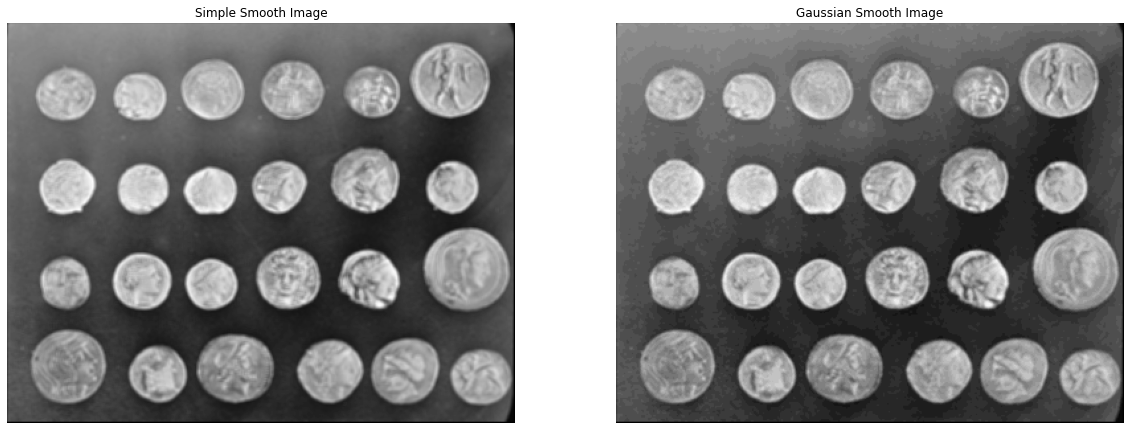

In [5]:
smooth_gauss_img = dip_localGaussianFilter(source_img)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].set_axis_off()
axes[0].set_title('Simple Smooth Image')
axes[0].imshow(smooth_img, cmap='gray')
axes[1].set_axis_off()
axes[1].set_title('Gaussian Smooth Image')
axes[1].imshow(smooth_gauss_img, cmap='gray')

We test the ability of the linear filter to denoise an image.

In [85]:
def salt_and_pepper_noise(image):
    # Creates a bidimensional array of
    # salt-and-pepper noise (not yet complete)
    samples = image.shape[0]
    tests = image.shape[1]
    p = 0.5 # probability
    n = samples * tests
    threshold = 0.5 * samples
    s = 255 * (np.random.binomial(samples, p, n) >= threshold).reshape(samples, tests)
    return s

Let's add some salt-and-pepper noise to our image

In [102]:
original_img = skimage.data.camera()
#noise = np.rint(np.random.normal(0, 0.1, size=original_img.shape) * original_img.std() * 2)
noise = salt_and_pepper_noise(original_img)
noisy_img = original_img + noise
noisy_img = np.clip(noisy_img, 0, 255) # constrains the pixel values within [0,255]
noise.shape

(512, 512)

We test the ability of the Gaussian filter to reduce the noice in the picture

(512, 512)

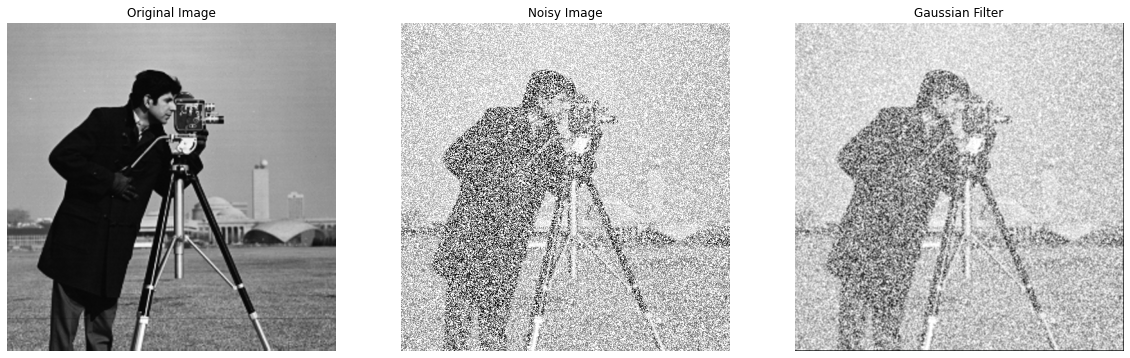

In [101]:
gaussian_img = dip_localGaussianFilter(noisy_img)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axes[0].set_title('Original Image')
axes[0].set_axis_off()
axes[0].imshow(original_img, cmap='gray')
axes[1].set_title('Noisy Image')
axes[1].set_axis_off()
axes[1].imshow(noisy_img, cmap='gray')
axes[2].set_title('Gaussian Filter')
axes[2].set_axis_off()
axes[2].imshow(gaussian_img, cmap='gray')
noise.shape

## Nonlinear filters
These filters are used to remove noise from an image without affecting too much the other pixels.
- Max and Min filters
- Median filter

In [103]:
def dip_minMaxFilter(image, minimum):
    # Creates a smoothed image from the input one by replacing 
    # the value of each pixel with the minimum(maximun) of its 
    # neighbors. If minimum = True, it computes the minimum filter
    # if minimum = False, it computes the maximum filter.
    
    rows = image.shape[0]
    cols = image.shape[1]
    smooth_img = np.zeros((rows, cols), dtype=int)
    
    for col in range(0, cols - 1):
        for row in range(0, rows - 1):
            min = 255
            max = 0
            for i in range(-1, 2):
                for j in range(-1, 2):
                    v = image[row + i, col + j]
                    if minimum:
                        if v < min:
                            min = v
                    else:
                        if v > max:
                            max = v
            if minimum:
                smooth_img[row, col] = min
            else:
                smooth_img[row, col] = max
    
    return smooth_img

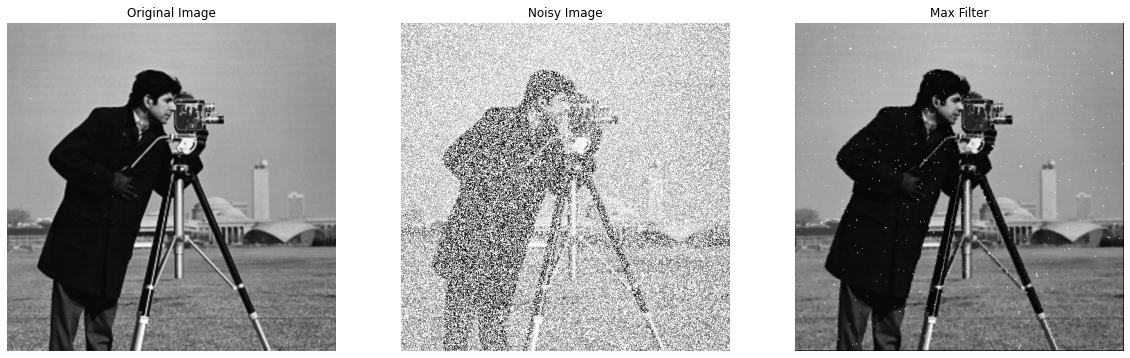

In [111]:
minmax_img = dip_minMaxFilter(noisy_img, True) # for some unknown reasons the max filter works better than the min filter
#minmax_img = dip_minMaxFilter(minmax_img, False)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axes[0].set_title('Original Image')
axes[0].set_axis_off()
axes[0].imshow(original_img, cmap='gray')
axes[1].set_title('Noisy Image')
axes[1].set_axis_off()
axes[1].imshow(noisy_img, cmap='gray')
axes[2].set_title('Max Filter')
axes[2].set_axis_off()
axes[2].imshow(minmax_img, cmap='gray')
#plt.savefig('max_filter.png')

In [109]:
def dip_medianFilter(image):
    # Creates a smoothed image from the input one by replacing 
    # the value of each pixel with the median of its 
    # neighbors. 
    rows = image.shape[0]
    cols = image.shape[1]
    smooth_img = np.zeros((rows, cols), dtype=int)
    
    for col in range(0, cols - 1):
        for row in range(0, rows - 1):
            k_vector = np.zeros(9, dtype=int)
            count = 0
            for i in range(-1, 2):
                for j in range(-1, 2):
                    k_vector[count] = image[row + i, col + j]
                    count = count + 1
            sorted = np.sort(k_vector) # sort the k_vector
            smooth_img[row, col] = sorted[4] # store the median value k_vector[4]
            
    return smooth_img

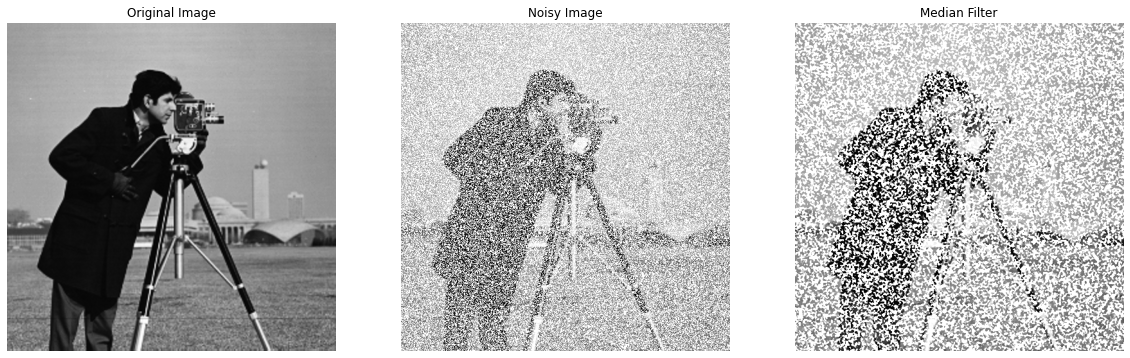

In [110]:
#median_img = dip_medianFilter(noisy_img)
median_img = filters.median(noisy_img)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axes[0].set_title('Original Image')
axes[0].set_axis_off()
axes[0].imshow(original_img, cmap='gray')
axes[1].set_title('Noisy Image')
axes[1].set_axis_off()
axes[1].imshow(noisy_img, cmap='gray')
axes[2].set_title('Median Filter')
axes[2].set_axis_off()
axes[2].imshow(median_img, cmap='gray')

In [4]:
plt.close('all')